# Introduction

In machine learning, decision trees are commonly used models. However, decision trees have a tendency to overfit the training data, which can cause them to perform poorly on the testing data. One way to prevent overfitting is through pruning the decision tree. Cost complexity pruning is a popular method for pruning decision trees. In this lab, we will use scikit-learn to demonstrate cost complexity pruning for decision trees.

# Load the Data

We will use the breast cancer dataset from scikit-learn. This dataset has 30 features and a binary target variable indicating if a patient has malignant or benign cancer.

In [3]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

# Split the Data

We will split the data into a training set and a testing set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Determine the Appropriate Alpha Values

We want to determine the appropriate alpha values to use for pruning the decision tree. We can do this by plotting the total impurity of the leaves versus the effective alphas of the pruned tree.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

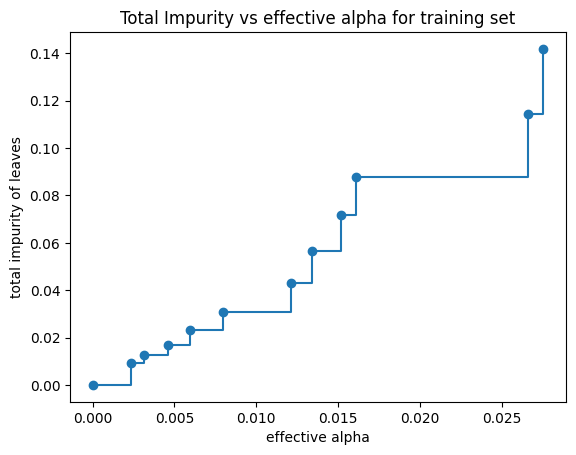

In [5]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')

# Train the Decision Trees

Next, we will train a decision tree using each of the effective alpha values. The last value in **ccp_alphas** is the alpha value that prunes the whole tree, leaving the tree with only one node.

In [6]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3247674769665928


# Remove Trivial Trees

We will remove the trivial tree with only one node from the list of decision trees.



In [7]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot the Number of Nodes and Depth of the Tree

We will plot the number of nodes and the depth of the tree as alpha increases.

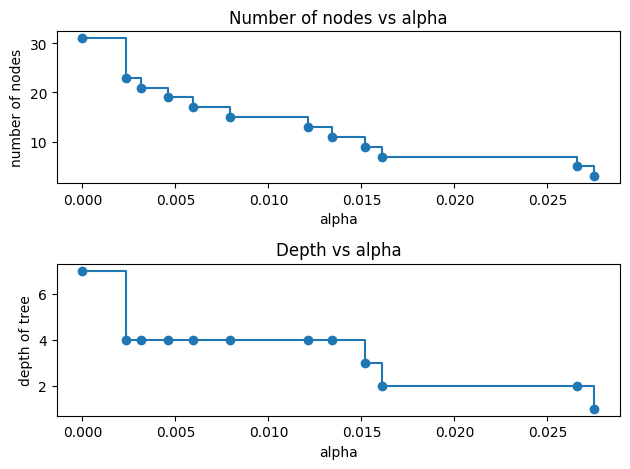

In [8]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Determine the Best Alpha Value

We want to determine the best alpha value to use for pruning the decision tree. We can do this by plotting the accuracy versus alpha for the training and testing sets.

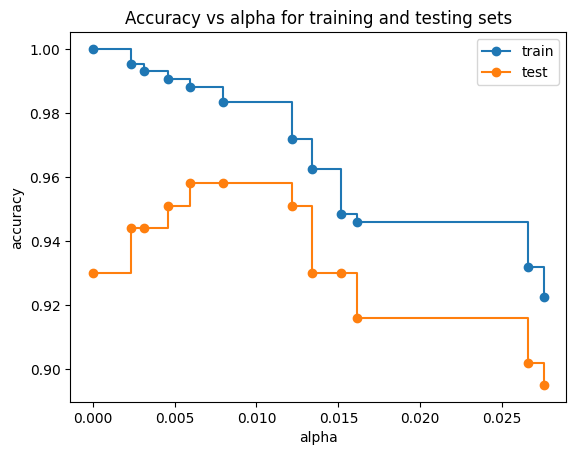

In [9]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Summary

In this lab, we demonstrated how to use scikit-learn to perform cost complexity pruning for decision trees. We split the data into a training and testing set, determined the appropriate alpha values to use for pruning, trained decision trees using the effective alpha values, plotted the number of nodes and depth of the tree, and determined the best alpha value to use for pruning based on the accuracy of the training and testing sets.